## Import models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Import mnist data set

In [2]:
# url = "https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv"

In [3]:
digits = pd.read_csv("mnist.csv")

In [4]:
# digits = pd.read_csv("url")
# digits.info()

In [5]:
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
digits.shape

(42000, 785)

## Pixel 

In [34]:
four = digits.iloc[8, 1:]
four.shape

(784,)

## Reshape a pixel

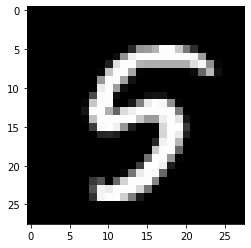

In [35]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [36]:
print(four[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0  41 149 156 179 254 254 201 119  46   0]
 [  0   0   0   0   0   0  13 147 241 253 253 254 253 253 253 253 245 160]
 [  0   0   0   0   0  31 224 253 253 180 174 175 174 174 174 174 223 247]
 [  0   0   0   0   7 197 254 253 165   2   0   0   0   0   0   0  12 102]
 [  0   0   0   0 152 253 254 162  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 235 254 158  15   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  74 250 253  15   0   0   0  16  20  19   0   0   0   0   0]
 [  0   0   7 199 253 253   0   0  25 130 235 254 247 145   6   0   0   0]
 [  0   0  20 253 253 177 100 219 240 253 253 254 253 253 125   0   0   0]
 [  0   0   5 193 253 253 254 253 253 200 155 155 238 253 229  23   0   0]
 [  0   0   0  61 249 254 241 150  30   0   0   0 215 254 254  58   0   0]
 [  0   0   0   0  36  39  30   0   0   0   0   0 214 253 234  31   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  41 241 253 183   0   0   0]
 [  0   0   0   0   0   0

In [37]:
digits.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [38]:
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

## Rescaling the features

In [39]:
from sklearn.preprocessing import scale
X = scale(X)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=20/100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)


## Import SVM and Train data

In [41]:
from sklearn import svm
from sklearn import metrics
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

## Predict single array of 2D  wrt y_test

In [42]:
# y_test

In [43]:
# index = 2751
# print("Predicted value :",svm_linear.predict([x_test.iloc[-4,:]]))
# print("Actual value :",y_test[index])

pewprocess

In [44]:
y_test

27395    3
22941    6
5684     2
40932    6
179      6
        ..
41451    5
34209    5
18946    1
34098    7
30016    1
Name: label, Length: 33600, dtype: int64

In [45]:
index = 6383
print("Predicted value :",svm_linear.predict([x_test[-1]]))
print("Actual value :",y_test[index])

Predicted value : [1]
Actual value : 6


In [46]:
# predict
predictions = svm_linear.predict(x_test)

## Accuracy

In [47]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9139880952380952